In [1]:
import nltk

# Download the punkt tokenizer data
nltk.download('punkt')

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Tamilselvan
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Tamilselvan
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
# Step 1: Load the Dataset 
file_path = 'IMDB Dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())



                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
# Step 2: Data Preprocessing
# Cleaning the text data
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-letter characters
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize the text
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    text = ' '.join(text)
    return text

df['review'] = df['review'].apply(clean_text)



C:\mm\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7991 - loss: 0.4453 - val_accuracy: 0.8899 - val_loss: 0.2641
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9141 - loss: 0.2182 - val_accuracy: 0.8861 - val_loss: 0.2693
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9353 - loss: 0.1724 - val_accuracy: 0.8860 - val_loss: 0.2798
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9535 - loss: 0.1342 - val_accuracy: 0.8844 - val_loss: 0.3233
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9712 - loss: 0.0866 - val_accuracy: 0.8804 - val_loss: 0.3803
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9815 - loss: 0.0576 - val_accuracy: 0.8811 - val_loss: 0.4294
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9843 - loss: 0.0464 - val_accuracy: 0.8810 - val_loss: 0.4877
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9871 - loss: 0.0361 -

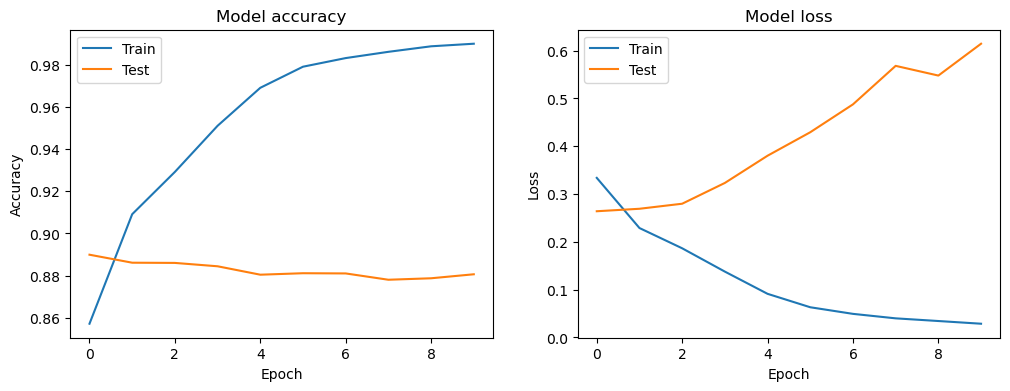

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



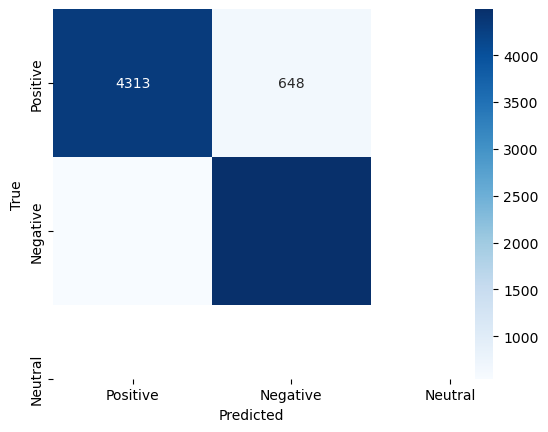

In [8]:
# Vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['review']).toarray()

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])
y = to_categorical(y, num_classes=3)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Building the ANN Model
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(128, input_shape=(input_dim,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Training the Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Step 5: Visualizing the Training Process
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Step 6: Evaluating the Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Positive', 'Negative', 'Neutral'], 
            yticklabels=['Positive', 'Negative', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 7: Classifying New Inputs
def classify_text(text):
    text = clean_text(text)
    text_vector = tfidf.transform([text]).toarray()
    prediction = model.predict(text_vector)
    return label_encoder.inverse_transform([np.argmax(prediction)])[0]


In [11]:

# Example of classifying new text input
new_text = input("Enter the text:")
print(f'\nSentiment: {classify_text(new_text)}')

Enter the text: A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terri

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Sentiment: positive
